# <center>Network Science</center>

## <center>Home Assignment #1: Power law</center>

### <center>Student: *Marina Ananyeva*</center>

#### <hr /> General Information

**Due Date:** 15.02.2016 23:59 <br \>
**Late submission policy:** -2 points per day <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2017] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1.

Load [wordcounts](http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt) dataset. 
1. Check that Zipf's Law holds
2. Assuming that the data is distributed according to the Power Law, find
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$
3. Produce summary of the frequencies: min, max, mean, median

### 1) Check that Zipf's Law holds

According to the lecture, Zipf's law is the frequency of a word in an natural language corpus is inversely proportional to its rank in the frequency table $f (k) ∼ 1/k$.
It can be defined by the following equation: $$
f(k) = \frac{\frac{1}{k^s}}{\sum_{n=1}^N \frac{1}{n^s} }
$$ where $N$ is the number of elements, $k$ - their rank and $s$ stands for be the value of the exponent characterizing the distribution. 
In order to check it, we generate values from formula of Zipf's law and try to compare it with our data.

In [1]:
#python3
#*_* encoding=utf-8

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import numpy.random as rnd

data = pd.read_csv('wordcounts.txt', delimiter=' ', names=['freq', 'word'])

Assuming power law distribution, the graph in log-log would look like a line.

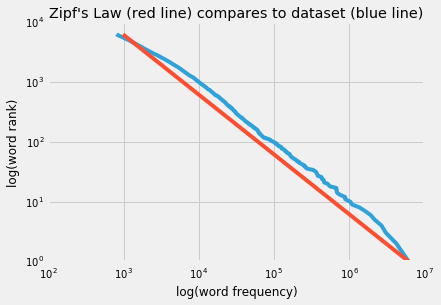

In [16]:
data = np.genfromtxt('wordcounts.txt')

# Array of ranks in ascending order
ranks = np.arange(1, len(data)+1)

# Word frequency according to Zipf's Law
word_freq_ideal = []
k = 1
for i in range(len(data)):
    word_freq_ideal.append(data[0,0] / k)
    k = k + 1

## Estimation by plot in log-log scale
with plt.style.context('fivethirtyeight'):
    fig.set_size_inches(20,15)
    plt.loglog(data[:,0], ranks)
    plt.loglog(word_freq_ideal, ranks)
    plt.title("Zipf's Law (red line) compares to dataset (blue line)")
    plt.xlabel("log(word frequency)")
    plt.ylabel("log(word rank)")


We can observe from the picture, that Zipf's law holds for this dataset.

### 2) Calculation of $\alpha$ and $\sigma$ of the distribution. 

Maximum likelihood estimation of parameter $\alpha$ is as follows:
$$
\alpha = 1 + n\left[ \sum_{i=1}^n \ln \frac{x_i}{x_{min}}  \right]^{-1}
$$
As for error estimate:
$$
\sigma = \sqrt{n} \left[ \sum_{i=1}^n \ln \frac{x_i}{x_{min}}  \right]^{-1} = \frac{\alpha - 1}{\sqrt{n}}
$$

In [14]:
from math import sqrt, log

Xmin = data.freq.min()
sum = 0
for i in range(len(data.freq)):
    sum += log(data.freq[i]/Xmin)
    
alpha = 1 + len(data.freq)*sum**(-1)
print("Alpha:", alpha)
sigma = (alpha - 1)/sqrt(len(data.freq))
print("Sigma:", sigma)

#Assuming the data is distributed according to Power Law, 
#mean sample variance sigma^2 is counted as follows:
var = np.var(D[:,0])
print('Sample variance =', var)

Alpha: 1.7194176300571224
Sigma: 0.009050889560804585
Sample variance = 15360778764.5


### 3) Summary of the frequencies: min, max, mean, median
It is important to make a remark, that when $alpha$ is less than 2, variance and mean values are not very useful as far as they depend on the sample size. Therefore, we can use median value instead of mean. 

In [12]:
# Summary of the frequencies: min, max, mean, median
print('Min = ',data.freq.min())
print('Max = ', data.freq.max())
print('Mean = ', data.freq.mean())
print('Median = ', data.freq.median())

Min =  800
Max =  6187267
Mean =  13566.670781893004
Median =  2335.0


### <hr /> Task 2.

Find and plot PDF and CDF for the following networks:
* [Routing network](http://www.leonidzhukov.net/hse/2015/networks/data/network.txt)
* [Web graph](http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt)

1. Are they correspondent to power law?
2. Find max and mean values of incoming and outcoming node degrees
3. Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$
4. Determine $x_{min}$ via Kolmogorov-Smirnov test
5. Try to fit Erdos model for the Web Graph and describe common and different points in their descriptive statistics

## <font color='green'>Routing network (undirected graph)</font>

### 1) Correspondence to power law

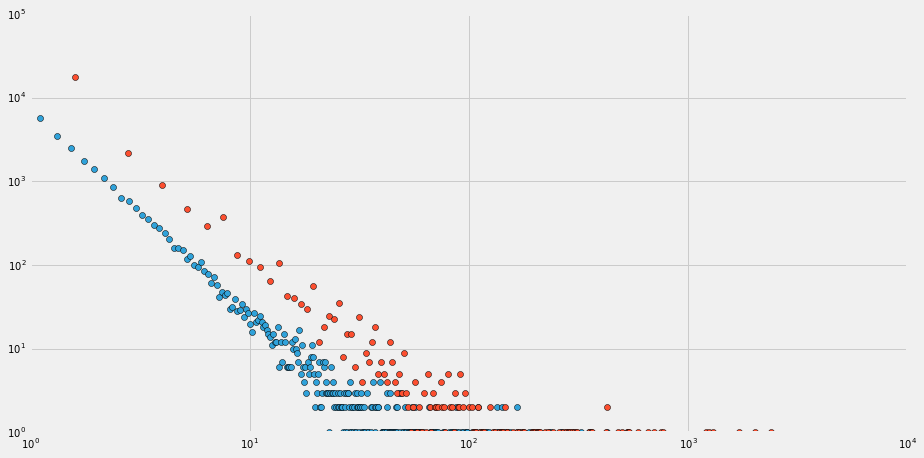

In [19]:
import networkx as nx

network = nx.read_edgelist('network.txt', create_using=nx.Graph())

deg = network.degree()
deg = np.array(list(deg.values()))

# Generate uniform pseudorandom variables
r = rnd.random(len(deg))
alpha = 2.435
xmin = deg.min();

# Produce power law
x = (1 - r)**(-1.0/(alpha - 1)) * xmin

yh, binEdges = np.histogram(x, bins = 2000)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
yhR, binEdgesR = np.histogram(kR, bins = 2000)
bincentersR = 0.5*(binEdgesR[1:] + binEdgesR[:-1])

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots()
    fig.set_size_inches(14,7)
    ax.loglog(bincenters, yh, 'o', lw=2)
    ax.loglog(bincentersR, yhR, 'o', lw=2)

According to the picture, we can conclude that the data corresponds to power law. 

### 2) Max and mean values of node degrees

Assuming the graph is undirected, incoming and outcoming node degrees are equal

In [20]:
a = np.array(list(routing.degree().values()))
print('Max values of incoming node degrees =  ', a.max())
print('Mean values of incoming node degrees =  ', a.mean())

Max values of incoming node degrees =   2390
Mean values of incoming node degrees =   4.21861255062


### 3) Parameters $\alpha$ and $\sigma$ (Maximum Likelihood)

In [21]:
Xmin = deg.min()
sum = 0
for i in range(len(deg)):
    sum += log(deg[i]/Xmin)
    
alpha1 = 1 + len(deg)*sum**(-1)
sigma1 = (alpha - 1)/sqrt(len(deg))
print('alpha = ', alpha1)
print('sigma = ', sigma1)

alpha =  2.435171752939503
sigma =  0.009469729815628086


### 4)  Find $x_{min}$ using Kolmogorov-Smirnov test

Xmin =  1


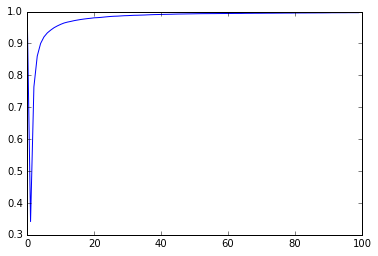

In [94]:
from scipy import stats

A = []
N = 100
for i in range(N):
    r = rnd.random(len(deg)*2)
    xmin = i
    # Produce power law
    x = (1 - r)**(-1.0/(alpha1 - 1)) * xmin

    temp = stats.ks_2samp(x, deg)
    A.append(temp[0])

plt.plot(range(N), A)
print('Xmin = ', A.index(min(A)))

In [99]:
def prep(filename, graph_type='all'):
    
    # download as graph
    G = nx.read_edgelist(filename+'.txt', create_using = nx.DiGraph())
    
    # get a numpy array with nodes degree
    if graph_type == 'all':
        nodes_degree = np.array(G.degree().values(), dtype = np.int)
    elif graph_type == 'in':
        nodes_degree = np.array(G.in_degree().values(), dtype = np.int)
    elif graph_type == 'out':
        nodes_degree = np.array(G.out_degree().values(), dtype = np.int)
    else:
        raise Exception("Error argument!")
               
    # number of nodes with k links
    number_of_nodes_with_k_links = np.bincount(nodes_degree)
        
    # pdf
    pdf = number_of_nodes_with_k_links.astype(float) / G.number_of_nodes()
        
    # cdf
    cdf = np.cumsum(pdf)
        
    return nodes_degree, number_of_nodes_with_k_links, pdf, cdf

def KS_test(filename, graph_type='all'):
    nodes_degree, number_of_nodes_with_k_links, pdf, cdf = prep(filename, graph_type)
    
    # make vector to put all max distances for all x_min cases
    max_distance = []
    
    # explore all x_min cases
    for x_min in xrange(1, max(nodes_degree)-1):
        # build CDF of power law model
        nodes_degree_obs_by_x_min = np.arange(1,max(nodes_degree)+1).astype(float)[x_min-1:] / x_min # remember that x >= x_min
        alpha = 1 + ( len(nodes_degree_obs_by_x_min) / np.sum(np.log(nodes_degree_obs_by_x_min)) )
        power_law_cdf = 1 - (nodes_degree_obs_by_x_min)**(1 - alpha)
        
        # experimental CDF
        exp_pdf = number_of_nodes_with_k_links.astype(float)[x_min:] / np.sum(number_of_nodes_with_k_links.astype(float)[x_min:])
        exp_cdf = np.cumsum(exp_pdf)
        
        # max distance for x_min
        M = max(abs(exp_cdf - power_law_cdf))
        max_distance.append(M)
    
    # ideal x_min from which we get power law in our experimantal model
    ideal_x_min = max_distance.index(min(max_distance))+1
    
    # alpha via ML in respect to ideal x_min
    ideal_nodes_degree_obs_by_x_min = np.arange(1,max(nodes_degree)+1).astype(float)[ideal_x_min-1:] / ideal_x_min
    ideal_alpha = 1 + ( len(ideal_nodes_degree_obs_by_x_min) / np.sum(np.log(ideal_nodes_degree_obs_by_x_min)) )
    
    # variance (for ideal x_min)
    ideal_var = (ideal_alpha - 1)**2 / len(ideal_nodes_degree_obs_by_x_min)
    
    print("x_min = {}, alpha = {} and variance = {}.\n").format(filename, graph_type, ideal_x_min, ideal_alpha, ideal_var)

In [102]:
KS_test('network')

x_min = 1104, alpha = 3.29693946247 and variance = 0.00409940240424


## <font color='green'>WEB graph (directed graph)</font>

### 1) Correspondence to power law

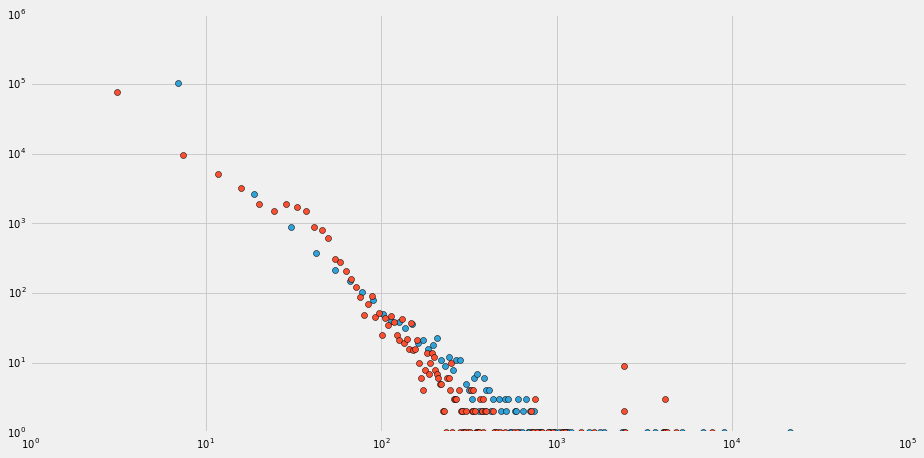

In [25]:
web = nx.read_edgelist('web_Stanford.txt', create_using=nx.DiGraph())

deg_W = web.degree()
deg_W = np.array(list(deg_W.values()))

# Generate uniform pseudorandom variables
r = rnd.random(len(deg_W))
alpha = 2.2
xmin = deg_W.min();

# Get power law!!!
x = (1 - r)**(-1.0/(alpha - 1)) * xmin

yh, binEdges = np.histogram(x, bins = 1800)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
yhW, binEdgesW = np.histogram(deg_W, bins = 1800)
bincentersW = 0.5*(binEdgesW[1:] + binEdgesW[:-1])

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots()
    fig.set_size_inches(14,7)
    ax.loglog(bincenters, yh, 'o', lw=2)
    ax.loglog(bincentersW, yhW, 'o', lw=2)

As for the previous graph, we can conclude that this dataset also corresponds to power law. 

### 2. Max and mean values of incoming and outcoming node degrees

In [29]:
a = np.array(list(web.in_degree().values()))
print('Max values of incoming node degree =  ', a.max())
b = np.array(list(web.out_degree().values()))
print('Max values of outcoming node degree =  ', b.max())
print('Mean values of node degree =  ', b.mean())

 Max value of incoming node degree = 38606
 Max value of outcoming node degree = 255
 Mean value of node degree = 8.203165627893283


### 3. (Maximum Likelihood) $\alpha$ and $\sigma$

In [27]:
Xmin = deg_W.min()
sum = 0
for i in range(len(deg_W)):
    sum += log(deg_W[i]/Xmin)
    
alpha_W = 1 + len(deg_W)*sum**(-1)
sigma_W = (alpha - 1)/sqrt(len(deg_W))
print('alpha = ', alpha_W)
print('sigma = ', sigma_W)

alpha =  1.9549128855430509
sigma =  0.0036623683083163968


### 4.  Find $x_{min}$ via Kolmogorov-Smirnov test

Xmin =  1


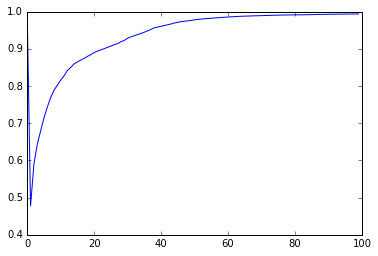

In [68]:
from scipy import stats

A = []
N = 100
for i in range(N):
    r = rnd.random(len(deg)*2)
    xmin = i
    # Produce power law
    x = (1 - r)**(-1.0/(alpha1 - 1)) * xmin

    temp = stats.ks_2samp(x, deg_W)
    A.append(temp[0])

plt.plot(range(N), A)
print('Xmin = ', D.index(min(A)))

In [ ]:
def prep(filename, graph_type='all'):
    
    # download as graph
    G = nx.read_edgelist(filename+'.txt', create_using = nx.DiGraph())
    
    # get a numpy array with nodes degree
    if graph_type == 'all':
        nodes_degree = np.array(G.degree().values(), dtype = np.int)
    elif graph_type == 'in':
        nodes_degree = np.array(G.in_degree().values(), dtype = np.int)
    elif graph_type == 'out':
        nodes_degree = np.array(G.out_degree().values(), dtype = np.int)
    else:
        raise Exception("Error argument!")
               
    # number of nodes with k links
    number_of_nodes_with_k_links = np.bincount(nodes_degree)
        
    # pdf
    pdf = number_of_nodes_with_k_links.astype(float) / G.number_of_nodes()
        
    # cdf
    cdf = np.cumsum(pdf)
        
    return nodes_degree, number_of_nodes_with_k_links, pdf, cdf

def KS_test(filename, graph_type='all'):
    nodes_degree, number_of_nodes_with_k_links, pdf, cdf = prep(filename, graph_type)
    
    # make vector to put all max distances for all x_min cases
    max_distance = []
    
    # explore all x_min cases
    for x_min in xrange(1, max(nodes_degree)-1):
        # build CDF of power law model
        nodes_degree_obs_by_x_min = np.arange(1,max(nodes_degree)+1).astype(float)[x_min-1:] / x_min # remember that x >= x_min
        alpha = 1 + ( len(nodes_degree_obs_by_x_min) / np.sum(np.log(nodes_degree_obs_by_x_min)) )
        power_law_cdf = 1 - (nodes_degree_obs_by_x_min)**(1 - alpha)
        
        # experimental CDF
        exp_pdf = number_of_nodes_with_k_links.astype(float)[x_min:] / np.sum(number_of_nodes_with_k_links.astype(float)[x_min:])
        exp_cdf = np.cumsum(exp_pdf)
        
        # max distance for x_min
        M = max(abs(exp_cdf - power_law_cdf))
        max_distance.append(M)
    
    # ideal x_min from which we get power law in our experimantal model
    ideal_x_min = max_distance.index(min(max_distance))+1
    
    # alpha via ML in respect to ideal x_min
    ideal_nodes_degree_obs_by_x_min = np.arange(1,max(nodes_degree)+1).astype(float)[ideal_x_min-1:] / ideal_x_min
    ideal_alpha = 1 + ( len(ideal_nodes_degree_obs_by_x_min) / np.sum(np.log(ideal_nodes_degree_obs_by_x_min)) )
    
    # variance (for ideal x_min)
    ideal_var = (ideal_alpha - 1)**2 / len(ideal_nodes_degree_obs_by_x_min)
    
    print("x_min = {}, alpha = {} and variance = {}.\n").format(filename, graph_type, ideal_x_min, ideal_alpha, ideal_var)

In [28]:
KS_test('web_Stanford','in')
KS_test('web_Stanford','out')

x_min = 3593, alpha = 1.6180207759 and variance = 1.09084845901e-05.
x_min = 172, alpha = 5.77060238577 and variance = 0.270936275275
